In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('/content/twitter_training.csv',names=['Tweet_ID','entity','sentiment','Tweet content'],header=None)

In [3]:
df.head()

,Tweet_ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.isnull().sum()

Tweet_ID           0
entity             0
sentiment          0
Tweet content    220
dtype: int64

In [5]:
df.drop('Tweet_ID',axis=1,inplace=True)
df.drop('entity',axis=1,inplace=True)
df.head()

,sentiment,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df["sentiment"].value_counts()

Positive      7278
Neutral       6166
Negative      6156
Irrelevant    4404
Name: sentiment, dtype: int64

**Encoding sentiment column**

Positive - 3
Neutral - 2
Negative - 1
Irrelevant - 0

In [7]:
df.sentiment = df.sentiment.map({'Positive':3, 'Neutral':2,'Negative':1,'Irrelevant':0})

In [8]:
df.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [9]:
df['Tweet content']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
23999    A truly incredible game. Gaming is the "show o...
24000    “Android Becomes Basically Unusable If You Tur...
24001    "Android basically becomes useless if you turn...
24002    "Android Becomes the Unusable If You Turn Off ...
24003    “Android Becomes Basically Illegal If You Pay ...
Name: Tweet content, Length: 24004, dtype: object

**Preprocessing the dataset**

In [10]:
#Remove Pattern from the input text
import re
def remove_pattern(input_txt, pattern):
  r=re.findall(pattern,input_txt)
  for word in r:
    input_txt=re.sub(word,"",input_txt)
  return input_txt  

In [ ]:
#Remove twitter handles (@user)
#df["Tweet"]=np.vectorize(remove_pattern)(df['Tweet content'])

**Remove Charecters, numbers and punctuations**

In [11]:
df["Tweet"]=df['Tweet content'].str.replace("[^a-zA-Z#]", " ")
df.head()

,sentiment,Tweet content,Tweet
0,3,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder ...


**Remove short words.**

In [12]:
df['Tweet']=df['Tweet'].astype("category")

In [13]:
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,sentiment,Tweet content,Tweet
0,3,im getting on borderlands and i will murder yo...,getting borderlands will murder
1,3,I am coming to the borders and I will kill you...,coming borders will kill
2,3,im getting on borderlands and i will kill you ...,getting borderlands will kill
3,3,im coming on borderlands and i will murder you...,coming borderlands will murder
4,3,im getting on borderlands 2 and i will murder ...,getting borderlands will murder


**Indiviual words considerd a a tokens**

In [14]:
df['Tweet']=df['Tweet'].astype("category")

In [15]:
df['Tweet']=df['Tweet'].astype(str)

In [16]:
tokenized_tweet=df["Tweet"].apply(lambda x: x.split())
tokenized_tweet.head()

0    [getting, borderlands, will, murder]
1           [coming, borders, will, kill]
2      [getting, borderlands, will, kill]
3     [coming, borderlands, will, murder]
4    [getting, borderlands, will, murder]
Name: Tweet, dtype: object

**Stem the words**

In [17]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0     [get, borderland, will, murder]
1          [come, border, will, kill]
2       [get, borderland, will, kill]
3    [come, borderland, will, murder]
4     [get, borderland, will, murder]
Name: Tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['Tweet']=tokenized_tweet
df.head()  

,sentiment,Tweet content,Tweet
0,3,im getting on borderlands and i will murder yo...,get borderland will murder
1,3,I am coming to the borders and I will kill you...,come border will kill
2,3,im getting on borderlands and i will kill you ...,get borderland will kill
3,3,im coming on borderlands and i will murder you...,come borderland will murder
4,3,im getting on borderlands 2 and i will murder ...,get borderland will murder


###**Exploratory Data Analysis**

In [19]:
df.groupby('sentiment').describe()

Tweet content         \
                  count unique   
sentiment                        
0                  4340   4124   
1                  6117   5804   
2                  6097   5793   
3                  7230   6766   

                                                                  Tweet  \
                                                         top freq count   
sentiment                                                                 
0                                                              18  4404   
1                                                        Wtf    8  6156   
2          At the same time, despite the fact that there ...   17  6166   
3                                                        Wow   20  7278   

                           
          unique top freq  
sentiment                  
0           3547      116  
1           4880      221  
2           5061      176  
3           5565      242

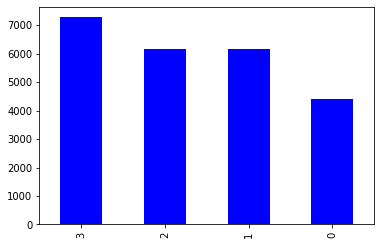

In [20]:
df['sentiment'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

As refrance of this "Positive: 3 Neutral: 2 Negative: 1 Irrelevant: 0"

we can say from above plot Negative sentiment is higher than other, then comes positive, Neutral, Irrelevant.

In [21]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Visualize the frequent words**

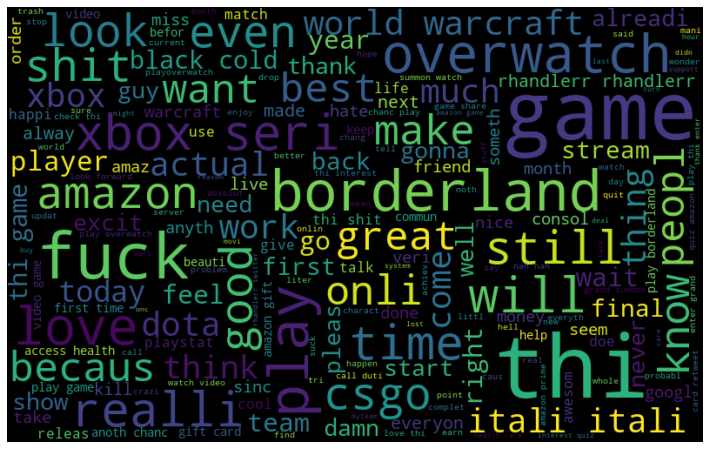

In [22]:
all_words=" ".join([sentence for sentence in df["Tweet"]])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Feature Extraction**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
x=bow_vectorizer.fit_transform(df['Tweet'])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['sentiment'], test_size = 0.25, random_state = 42)

In [30]:
#x_train.shape, x_test.shape

**Model Building**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [29]:
#training
#model=LogisticRegression()
#model.fit(x_train,y_train)

In [ ]:
#testing
#pred=model.predict(x_test)
#f1_score(y_test,pred)

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([3, 3, 3, ..., 3, 1, 1])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 774   77   79  158]
 [  75 1218   68  177]
 [  75  120 1136  180]
 [  85  132   94 1553]]
The model accuracy is 0.780036660556574
